In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
df_Concurrence_O = pd.read_csv(r'Concurrence/Concurrence_O_Gamma.txt', sep='\t', header = None)
df_Concurrence_U = pd.read_csv(r'Concurrence/Concurrence_U_Gamma.txt', sep='\t', header = None)

df_Entanglement_O = pd.read_csv(r'Concurrence/Entanglement_O_Gamma.txt', sep='\t', header = None)
df_Entanglement_U = pd.read_csv(r'Concurrence/Entanglement_U_Gamma.txt', sep='\t', header = None)

In [3]:
df_Concurrence_O.rename(columns = lambda s: (s/20))

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0,0.015072,0.842381,0.173627,0.009821,0.735848,0.023823,0.673754,0.872916,0.746069,0.315356,...,0.201820,0.191259,0.240734,0.117871,0.225108,0.694543,0.114326,0.302403,0.072231,0.706383
1,0.302922,0.299871,0.199211,0.592698,0.092117,0.294962,0.037794,0.397815,0.002934,0.169887,...,0.183164,0.462794,0.009057,0.333120,0.030741,0.803980,0.459501,0.393787,0.170084,0.293752
2,0.301152,0.194311,0.195097,0.054828,0.029634,0.518557,0.426891,0.194556,0.182540,0.241482,...,0.398314,0.211621,0.801960,0.725905,0.539940,0.725416,0.274526,0.155169,0.375348,0.520586
3,0.253853,0.732023,0.811645,0.684383,0.273300,0.305418,0.393780,0.512703,0.117489,0.169036,...,0.180717,0.635526,0.413935,0.121485,0.088816,0.279521,0.681925,0.555366,0.437271,0.265120
4,0.729768,0.205247,0.120564,0.431747,0.997905,0.144976,0.285055,0.725998,0.367988,0.655400,...,0.249470,0.286779,0.541378,0.061771,0.155957,0.452837,0.816094,0.050001,0.805551,0.219960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.035433,0.874107,0.648798,0.748809,0.292965,0.700659,0.107853,0.379637,0.159300,0.064497,...,0.860676,0.315039,0.161007,0.213810,0.010148,0.106365,0.018850,0.144873,0.758853,0.198375
999996,0.658909,0.009281,0.121286,0.644999,0.181095,0.143773,0.106556,0.013905,0.375446,0.442901,...,0.318020,0.050440,0.821174,0.189343,0.200693,0.106461,0.112499,0.501580,0.052297,0.128767
999997,0.402482,0.023913,0.089536,0.039585,0.134372,0.091268,0.049667,0.714910,0.998008,0.669138,...,0.009366,0.183910,0.176383,0.146404,0.853858,0.497249,0.033316,0.921868,0.869840,0.611295
999998,0.199236,0.402303,0.602955,0.161955,0.154565,0.021093,0.630952,0.423738,0.480893,0.803614,...,0.369914,0.188741,0.419109,0.613484,0.084287,0.269206,0.950692,0.025341,0.711509,0.601825


In [4]:
Concurrence_O = df_Concurrence_O.values
Concurrence_U = df_Concurrence_U.values

Entanglement_O = df_Entanglement_O.values
Entanglement_U = df_Entanglement_U.values

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


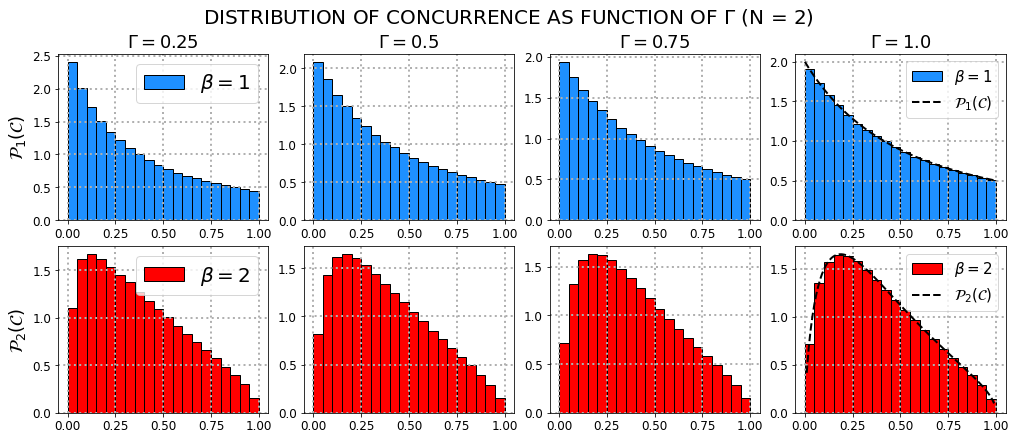

In [5]:
def Concurrence_distribution_O(x):
    for i in range(len(x)):
        p_O_x[i] = 2/((1+x[i])**2)
    return p_O_x

def Concurrence_distribution_U(x):
    for i in range(len(x)):
        p_U_x[i] = ((2*x[i])/(1-(x[i]**2))**3)*(3*(2+3*x[i]**2)*np.arctanh(np.sqrt(1-x[i]**2))-(11+4*x[i]**2)*np.sqrt(1-x[i]**2))
    return p_U_x
        
fig, axs = plt.subplots(2,4, figsize = (14,6), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONCURRENCE AS FUNCTION OF $\Gamma$ (N = 2)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(Concurrence_O[:,gamma_idx], bins = 20, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(Concurrence_U[:,gamma_idx], bins = 20, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{1}(\mathcal{C})$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{2}(\mathcal{C})$', fontsize = 18)
    
    if (j == 3):
        x = [i/100 for i in range(0,100)]
        p_O_x = [[] for i in range(0,100)]
        p_U_x = [[] for i in range(0,100)]
        p_O_x = Concurrence_distribution_O(x)
        p_U_x = Concurrence_distribution_U(x)
        axs[0,j].plot(x, p_O_x, color = 'black', label = r'$\mathcal{P}_{1}(\mathcal{C})$', linestyle = 'dashed', linewidth = 2)
        axs[1,j].plot(x, p_U_x, color = 'black', label = r'$\mathcal{P}_{2}(\mathcal{C})$', linestyle = 'dashed', linewidth = 2)
        axs[0,3].legend(fontsize = 15, loc = 'upper right')
        axs[1,3].legend(fontsize = 15, loc = 'upper right')
        
    for i in range(0,2):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':', linewidth = 2)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 12)

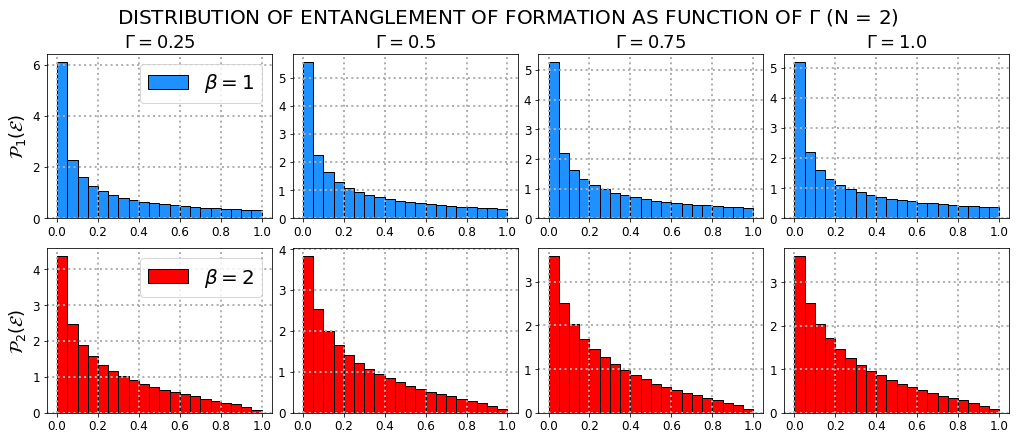

In [6]:
fig, axs = plt.subplots(2,4, figsize = (14,6), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF ENTANGLEMENT OF FORMATION AS FUNCTION OF $\Gamma$ (N = 2)', fontsize = 20)

for j in range(0,4):
    
    gamma_idx = 5*j+5
    
    gamma_value = 0.25*gamma_idx/5
    
    axs[0,j].hist(Entanglement_O[:,gamma_idx], bins = 20, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
    axs[1,j].hist(Entanglement_U[:,gamma_idx], bins = 20, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
    
    axs[0,j].set_title(r'$\Gamma = $'+ str(gamma_value), fontsize = 18)
    
    axs[0,0].set_ylabel(r'$\mathcal{P}_{1}(\mathcal{E})$', fontsize = 18)
    axs[1,0].set_ylabel(r'$\mathcal{P}_{2}(\mathcal{E})$', fontsize = 18)
    
    for i in range(0,2):
        axs[i,0].legend(fontsize = 20)
        axs[i,j].grid(linestyle=':', linewidth = 2)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 12)

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  
/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


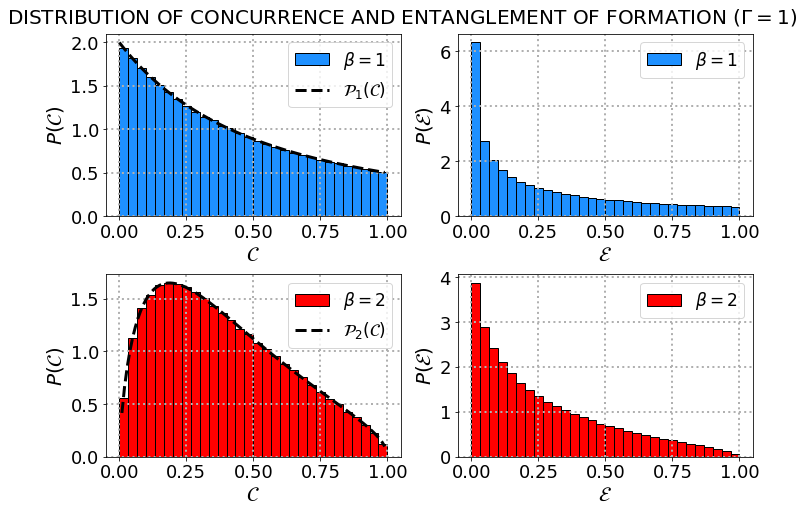

In [7]:
def Concurrence_distribution_O(x):
    for i in range(len(x)):
        p_O_x[i] = 2/((1+x[i])**2)
    return p_O_x

def Concurrence_distribution_U(x):
    for i in range(len(x)):
        p_U_x[i] = ((2*x[i])/(1-(x[i]**2))**3)*(3*(2+3*x[i]**2)*np.arctanh(np.sqrt(1-x[i]**2))-(11+4*x[i]**2)*np.sqrt(1-x[i]**2))
    return p_U_x
        
fig, axs = plt.subplots(2,2, figsize = (10,7), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'DISTRIBUTION OF CONCURRENCE AND ENTANGLEMENT OF FORMATION ($\Gamma = 1$)', fontsize = 20)

x = [i/100 for i in range(0,100)]
p_O_x = [[] for i in range(0,100)]
p_U_x = [[] for i in range(0,100)]
p_O_x = Concurrence_distribution_O(x)
p_U_x = Concurrence_distribution_U(x)

axs[0,0].hist(Concurrence_O[:,20], bins = 30, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
axs[1,0].hist(Concurrence_U[:,20], bins = 30, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
axs[0,0].plot(x, p_O_x, color = 'black', label = r'$\mathcal{P}_{1}(\mathcal{C})$', linestyle = 'dashed', linewidth = 3)
axs[1,0].plot(x, p_U_x, color = 'black', label = r'$\mathcal{P}_{2}(\mathcal{C})$', linestyle = 'dashed', linewidth = 3)

axs[0,1].hist(Entanglement_O[:,20], bins = 30, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
axs[1,1].hist(Entanglement_U[:,20], bins = 30, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');

for i in range(2):
    for j in range(2):
    
        axs[i,j].legend(fontsize = 17)
        axs[i,0].set_xlabel(r'$\mathcal{C}$', fontsize = 20)
        axs[i,0].set_ylabel(r'$P(\mathcal{C})$', fontsize = 20)
        axs[i,1].set_xlabel(r'$\mathcal{E}$', fontsize = 20)
        axs[i,1].set_ylabel(r'$P(\mathcal{E})$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
        axs[i,j].grid(linestyle=':', linewidth = 2)

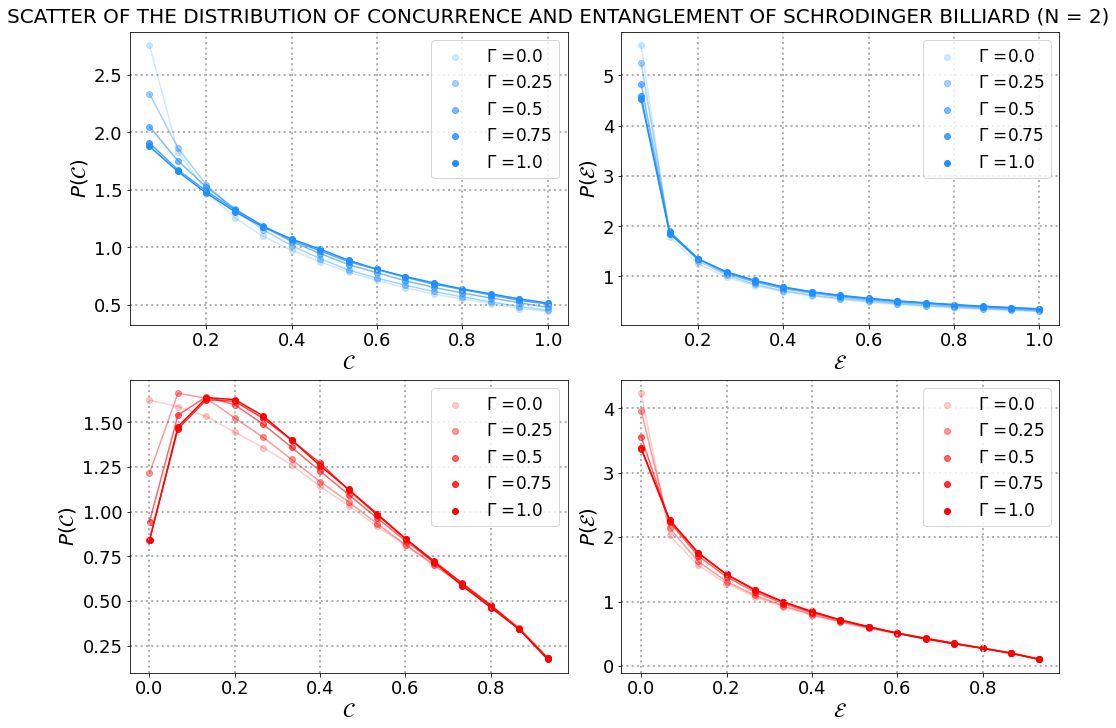

In [8]:
fig, axs = plt.subplots(2,2, figsize = (14,10), constrained_layout = True, facecolor='w')

fig.suptitle(r'SCATTER OF THE DISTRIBUTION OF CONCURRENCE AND ENTANGLEMENT OF SCHRODINGER BILLIARD (N = 2)', fontsize = 20)

for j in range(0,5):
    
    gamma_idx = 5*j
    
    gamma_value = 0.25*gamma_idx/5
    
    counts_C_O, bin_edges_C_O = np.histogram(Concurrence_O[:,gamma_idx], bins = 15, density = True)
    counts_C_U, bin_edges_C_U = np.histogram(Concurrence_U[:,gamma_idx], bins = 15, density = True)
    counts_E_O, bin_edges_E_O = np.histogram(Entanglement_O[:,gamma_idx], bins = 15, density = True)
    counts_E_U, bin_edges_E_U = np.histogram(Entanglement_U[:,gamma_idx], bins = 15, density = True)

    axs[0,0].scatter(bin_edges_C_O[1:], counts_C_O, color = 'dodgerblue', alpha = (j+1)/5, label = r'$\Gamma$ ='+str(gamma_value))
    axs[0,0].plot(bin_edges_C_O[1:], counts_C_O, color = 'dodgerblue', alpha = (j+1)/5)

    axs[1,0].scatter(bin_edges_C_U[0:len(bin_edges_C_U)-1], counts_C_U, color = 'red', alpha = (j+1)/5, label = r'$\Gamma$ ='+str(gamma_value))
    axs[1,0].plot(bin_edges_C_U[0:len(bin_edges_C_U)-1], counts_C_U, color = 'red', alpha = (j+1)/5)
    
    axs[0,1].scatter(bin_edges_E_O[1:], counts_E_O, color = 'dodgerblue', alpha = (j+1)/5, label = r'$\Gamma$ ='+str(gamma_value))
    axs[0,1].plot(bin_edges_E_O[1:], counts_E_O, color = 'dodgerblue', alpha = (j+1)/5)

    axs[1,1].scatter(bin_edges_E_U[0:len(bin_edges_E_U)-1], counts_E_U, color = 'red', alpha = (j+1)/5, label = r'$\Gamma$ ='+str(gamma_value) )
    axs[1,1].plot(bin_edges_E_U[0:len(bin_edges_E_U)-1], counts_E_U, color = 'red', alpha = (j+1)/5)

    
    for i in range(2):
        for j in range(2):
    
            axs[i,j].legend(fontsize = 17)
            axs[i,0].set_xlabel(r'$\mathcal{C}$', fontsize = 20)
            axs[i,0].set_ylabel(r'$P(\mathcal{C})$', fontsize = 20)
            axs[i,1].set_xlabel(r'$\mathcal{E}$', fontsize = 20)
            axs[i,1].set_ylabel(r'$P(\mathcal{E})$', fontsize = 20)
            axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)
            axs[i,j].grid(linestyle=':', linewidth = 2)

In [9]:
meanConcurrence_O = np.mean(Concurrence_O, axis = 0)
meanConcurrence_U = np.mean(Concurrence_U, axis = 0)

varConcurrence_O = np.var(Concurrence_O, axis = 0)
varConcurrence_U = np.var(Concurrence_U, axis = 0)


meanEntanglement_O = np.mean(Entanglement_O, axis = 0)
meanEntanglement_U = np.mean(Entanglement_U, axis = 0)

varEntanglement_O = np.var(Entanglement_O, axis = 0)
varEntanglement_U = np.var(Entanglement_U, axis = 0)

In [10]:
print("Mean of orthogonal concurrence distribution: " + str(meanConcurrence_O[20]))
print("Mean of unitary concurrence distribution: " + str(meanConcurrence_U[20]))

print("\nVariance of orthogonal concurrence distribution: " + str(varConcurrence_O[20]))
print("Variance of unitary concurrence distribution: " + str(varConcurrence_U[20]))

print("\nMean of orthogonal entanglement distribution: " + str(meanEntanglement_O[20]))
print("Mean of unitary entanglement distribution: " + str(meanEntanglement_U[20]))

print("\nVariance of orthogonal entanglement distribution: " + str(varEntanglement_O[20]))
print("Variance of unitary entanglement distribution: " + str(varEntanglement_U[20]))

Mean of orthogonal concurrence distribution: 0.38607190150541676
Mean of unitary concurrence distribution: 0.387624791596584

Variance of orthogonal concurrence distribution: 0.07818040861884296
Variance of unitary concurrence distribution: 0.05642908265289824

Mean of orthogonal entanglement distribution: 0.2856295847401534
Mean of unitary entanglement distribution: 0.27323297524456913

Variance of orthogonal entanglement distribution: 0.078444557302514
Variance of unitary entanglement distribution: 0.05663223658736498


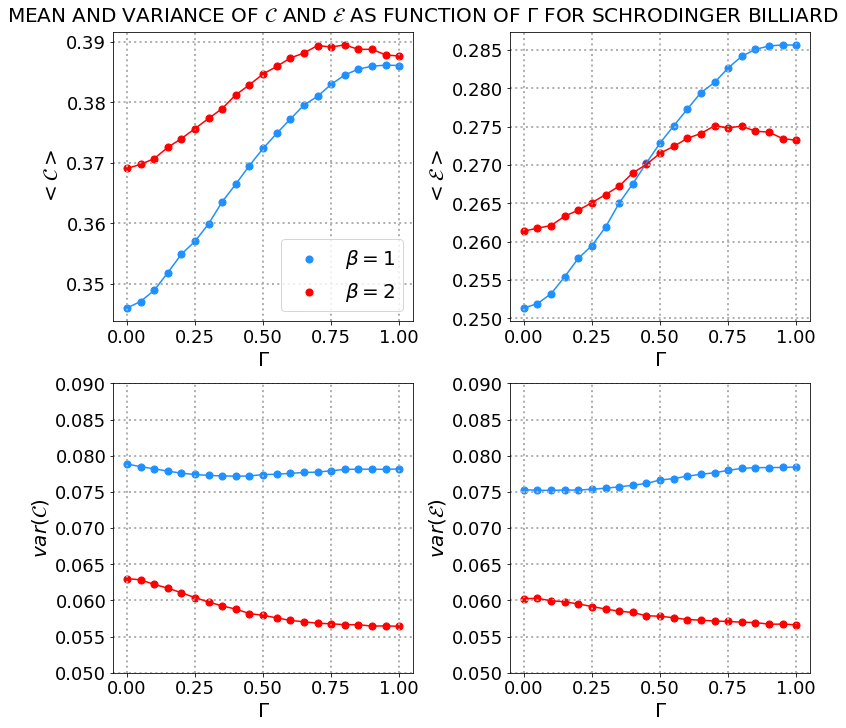

In [11]:
fig, axs = plt.subplots(2,2, figsize = (11,10), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'MEAN AND VARIANCE OF $\mathcal{C}$ AND $\mathcal{E}$ AS FUNCTION OF $\Gamma$ FOR SCHRODINGER BILLIARD', fontsize = 20)

axs[0,0].scatter([i/20 for i in range(21)], meanConcurrence_O, s = 50, label = r'$\beta = 1$', color = 'dodgerblue',  alpha = 1)
axs[0,0].scatter([i/20 for i in range(21)], meanConcurrence_U, s = 50, label = r'$\beta = 2$', color = 'red',  alpha = 1)
axs[0,0].plot([i/20 for i in range(21)], meanConcurrence_O, color = 'dodgerblue')
axs[0,0].plot([i/20 for i in range(21)], meanConcurrence_U, color = 'red')
            
axs[0,1].scatter([i/20 for i in range(21)], meanEntanglement_O, s = 50, color = 'dodgerblue',  alpha = 1)
axs[0,1].scatter([i/20 for i in range(21)], meanEntanglement_U, s = 50, color = 'red',  alpha = 1)
axs[0,1].plot([i/20 for i in range(21)], meanEntanglement_O, color = 'dodgerblue')
axs[0,1].plot([i/20 for i in range(21)], meanEntanglement_U, color = 'red')

axs[1,0].scatter([i/20 for i in range(21)], varConcurrence_O, s = 50, label = r'$\beta = 1$', color = 'dodgerblue',  alpha = 1)
axs[1,0].scatter([i/20 for i in range(21)], varConcurrence_U, s = 50, label = r'$\beta = 2$', color = 'red',  alpha = 1)
axs[1,0].plot([i/20 for i in range(21)], varConcurrence_O, color = 'dodgerblue')
axs[1,0].plot([i/20 for i in range(21)], varConcurrence_U, color = 'red')
            
axs[1,1].scatter([i/20 for i in range(21)], varEntanglement_O, s = 50, color = 'dodgerblue',  alpha = 1)
axs[1,1].scatter([i/20 for i in range(21)], varEntanglement_U, s = 50, color = 'red',  alpha = 1)
axs[1,1].plot([i/20 for i in range(21)], varEntanglement_O, color = 'dodgerblue')
axs[1,1].plot([i/20 for i in range(21)], varEntanglement_U, color = 'red')

    
axs[0,0].legend(fontsize = 20)

axs[0,0].set_ylabel(r'$<\mathcal{C}>$', fontsize = 20)
axs[1,0].set_ylabel(r'$var(\mathcal{C})$', fontsize = 20)
axs[0,1].set_ylabel(r'$<\mathcal{E}>$', fontsize = 20)
axs[1,1].set_ylabel(r'$var(\mathcal{E})$', fontsize = 20)

axs[1,0].set_ylim(0.05,0.09)
axs[1,1].set_ylim(0.05,0.09)

for i in range(2):
    for j in range(2):
        axs[i,j].grid(linestyle=':', linewidth = 2)

        axs[i,j].set_xlabel(r'$\Gamma$', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)


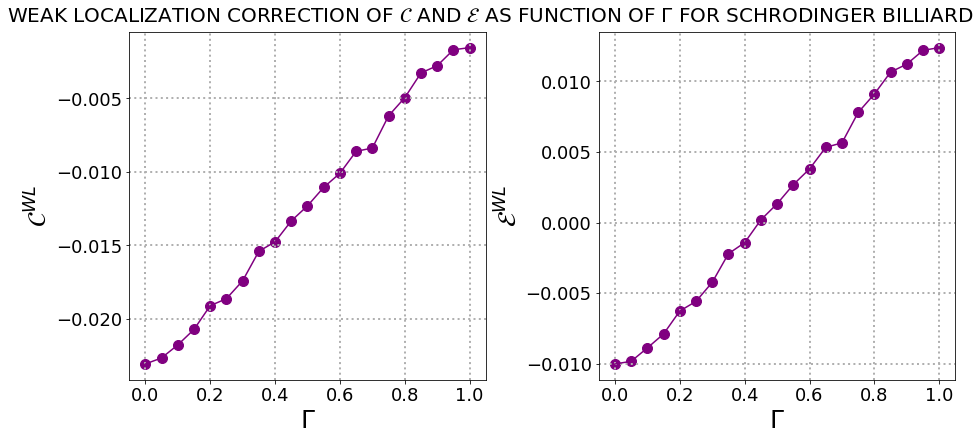

In [12]:
fig, axs = plt.subplots(1,2, figsize = (13,6), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF $\mathcal{C}$ AND $\mathcal{E}$ AS FUNCTION OF $\Gamma$ FOR SCHRODINGER BILLIARD', fontsize = 20)

axs[0].plot([i/20 for i in range(0,21)], (meanConcurrence_O-meanConcurrence_U), color = 'purple', linestyle = '-')
for k in range(0,len(meanConcurrence_O)):
        axs[0].scatter((k)/20, (meanConcurrence_O[k]-meanConcurrence_U[k]), s = 100, color = 'purple', alpha = 1)
    
axs[1].plot([i/20 for i in range(0,21)], (meanEntanglement_O-meanEntanglement_U), color = 'purple', linestyle = '-')
for k in range(0,len(meanConcurrence_O)):
        axs[1].scatter((k)/20, (meanEntanglement_O[k]-meanEntanglement_U[k]), s = 100, color = 'purple', alpha = 1)

axs[0].set_ylabel(r'$\mathcal{C}^{WL}$', fontsize = 25)

axs[1].set_ylabel(r'$\mathcal{E}^{WL}$', fontsize = 25)


for i in range(0,2):
    axs[i].grid(linestyle=':', linewidth = 2)
    axs[i].set_xlabel(r'$\Gamma$', fontsize = 25)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

/home/rafael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/rafael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=Tr

In [14]:
X_C_data = np.array([i/20 for i in range(0,21)])
X_C = X_C_data.reshape(-1,1)

y_C_data = (meanConcurrence_O-meanConcurrence_U)
y_C = y_C_data.reshape(-1,1)

degree = 1
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_C,y_C)

print("\n######################################\n")

print("Coefficients of the concurrence polynomial (degree = 1):")
print(polyreg.steps[1][1].coef_)
print("\nINtercept of the concurrence polynomial (degree = 1):")
print(polyreg.steps[1][1].intercept_)


######################################

Coefficients of the concurrence polynomial (degree = 1):
[[0.         0.02321672]]

INtercept of the concurrence polynomial (degree = 1):
[-0.02389398]


In [15]:
X_seq = np.linspace(X_C.min(),X_C.max(),300).reshape(-1,1)


##############################

Coefficients of the entanglement of formation polynomial (degree = 1):
[[0.         0.02461852]]

Intercept of the entanglement of formation polynomial (degree = 1):
[-0.01107102]


Text(0, 0.5, '$\\mathcal{E}^{WL}$')

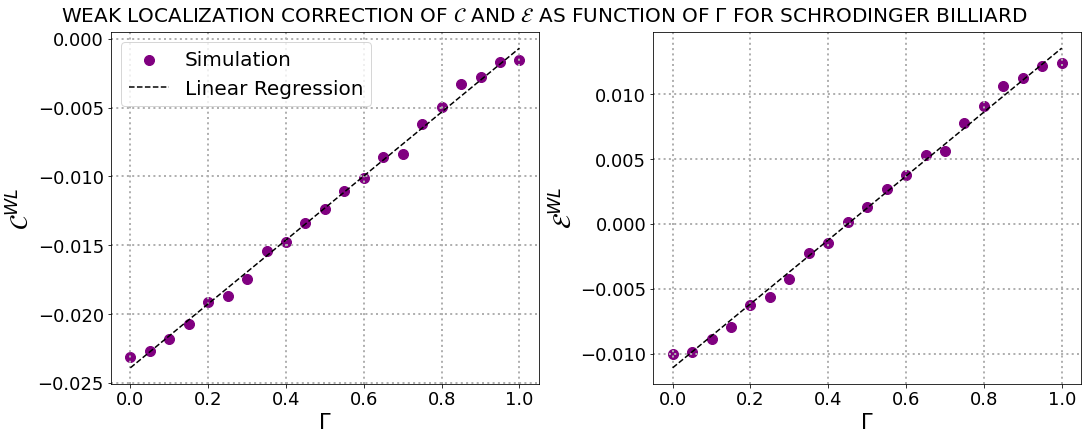

In [16]:
fig, axs = plt.subplots(1,2, figsize = (15,6), constrained_layout = True, facecolor = 'w')

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF $\mathcal{C}$ AND $\mathcal{E}$ AS FUNCTION OF $\Gamma$ FOR SCHRODINGER BILLIARD', fontsize = 20)

axs[0].scatter(X_C,y_C, s = 100, color = 'purple', label = 'Simulation')
axs[0].plot(X_seq, polyreg.predict(X_seq), color = 'black', linestyle = 'dashed', label = 'Linear Regression')
axs[0].grid(linestyle = ':', linewidth = 2)
axs[0].set_xlabel(r'$\Gamma$', fontsize = 21)
axs[0].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[0].set_ylabel(r'$\mathcal{C}^{WL}$', fontsize = 25)
axs[0].legend(fontsize = 20)

X_data = np.array([i/20 for i in range(0,21)])
X = X_data.reshape(-1,1)

y_data = (meanEntanglement_O - meanEntanglement_U)
y = y_data.reshape(-1,1)

degree = 1

polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

print("\n##############################\n")
print("Coefficients of the entanglement of formation polynomial (degree = 1):")
print(polyreg.steps[1][1].coef_)
print("\nIntercept of the entanglement of formation polynomial (degree = 1):")
print(polyreg.steps[1][1].intercept_)

X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
axs[1].scatter(X,y, s = 100, color = 'purple')
axs[1].plot(X_seq, polyreg.predict(X_seq), color = 'black', linestyle = 'dashed')
axs[1].grid(linestyle = ':', linewidth = 2)
axs[1].set_xlabel(r'$\Gamma$', fontsize = 21)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 18)
axs[1].set_ylabel(r'$\mathcal{E}^{WL}$', fontsize = 25)